# Input Functions, esp. for [15O]H2O
## Setup

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [2]:
# system functions that are always useful to have
import time
from pprint import pprint

# basic numeric setup
import numpy as np

from RadialArteryContext import RadialArteryContext
from BoxcarContext import BoxcarContext

%matplotlib inline

In [3]:
# define data & models; everything is decay corrected
kerndir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "kernels")
petdir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421152358", "pet")
idif = os.path.join(petdir, "sub-108293_ses-20210421152358_trc-ho_proc-MipIdif_idif.nii.gz")
twil = os.path.join(petdir, "sub-108293_ses-20210421152358_trc-ho_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc.nii.gz")
kern = os.path.join(kerndir, "kernel_hct=46.8.nii.gz")


### Defining truths for Artery

```
    v[0] = u[0] * 30                # t_0
    v[1] = u[1] * 30                # \tau_2 ~ t_2 - t_0
    v[2] = u[2] * 20                # \alpha - 1
    v[3] = u[3] * 30 + 3            # 1/\beta
    v[4] = u[4] * 2.5 + 0.5         # p
    v[5] = u[5] * 3 - 3             # \delta p_2 ~ p_2 - p
    v[6] = u[6] * 3 - 3             # \delta p_3 ~ p_3 - p_2
    v[7] = u[7] * 5 * halflife      # 1/\gamma for s.s.
    v[8] = u[8] * 0.9               # f_2
    v[9] = u[9] * 0.9               # f_3
    v[10] = u[10] * 4 + 0.5         # A is amplitude adjustment
    v[11] = u[11] * sigma           # sigma ~ fraction of M0
```

In [4]:
truths_twil = [
    2.00391507e+01,  7.88889966e+00,  
    2.07993344e+00,  3.16764716e+00,  2.88680090e+00, -1.52597860e+00, -1.90010891e+00, 3.42293611e+02,  
    3.42342649e-01,  4.41082060e-02,  
    2.53274962e+00,  
    3.17004451e-02]

truths_idif = [
    10.2470, 29.5557, 
    0.7034, 7.9721, 1.2702, -1.8154, -1.3315, 196.1650,
    0.1356, 0.0074, 
    2.4554,
    0.0100]

# Inspect RadialArtery

In [4]:
dd = {
    "input_func_fqfn": twil,
    "kernel_fqfn": kern,
    "tag": "playground_ra",
    "nlive": 3000
}
ra = RadialArteryContext(dd)

### Plot RadialArtery ra

In [ ]:
ra.plotting.truths_plot(truths_twil)

In [ ]:
ra.plotting.variations_plot(
    truths_twil, 
    tindex=4, tmin=0.5, tmax=3, 
    ncolors=1000, alpha=0.3, linewidth=3, 
    do_save=False)

### Let's sample from this distribution of ra using the default `dynesty` settings with `'slice'`.

Previously, 4bolus model with t^(alpha - 1) gave:  
    # iter: 23900 | batch: 6 | bound: 22 | nc: 1 | ncall: 2130740 | eff(%):  1.107 |   
    # loglstar: 385.219 < 396.293 < 393.275 | logz: 347.713 +/-  0.256 | stop:  0.912  

121953it [10:01, 202.87it/s, batch: 0 | bound: 122 | nc: 1 | ncall: 9860907 | eff(%):  1.237 | loglstar:   -inf < 447.223 <    inf | logz: 412.183 +/-  0.098 | dlogz:  0.000 >  0.010]  


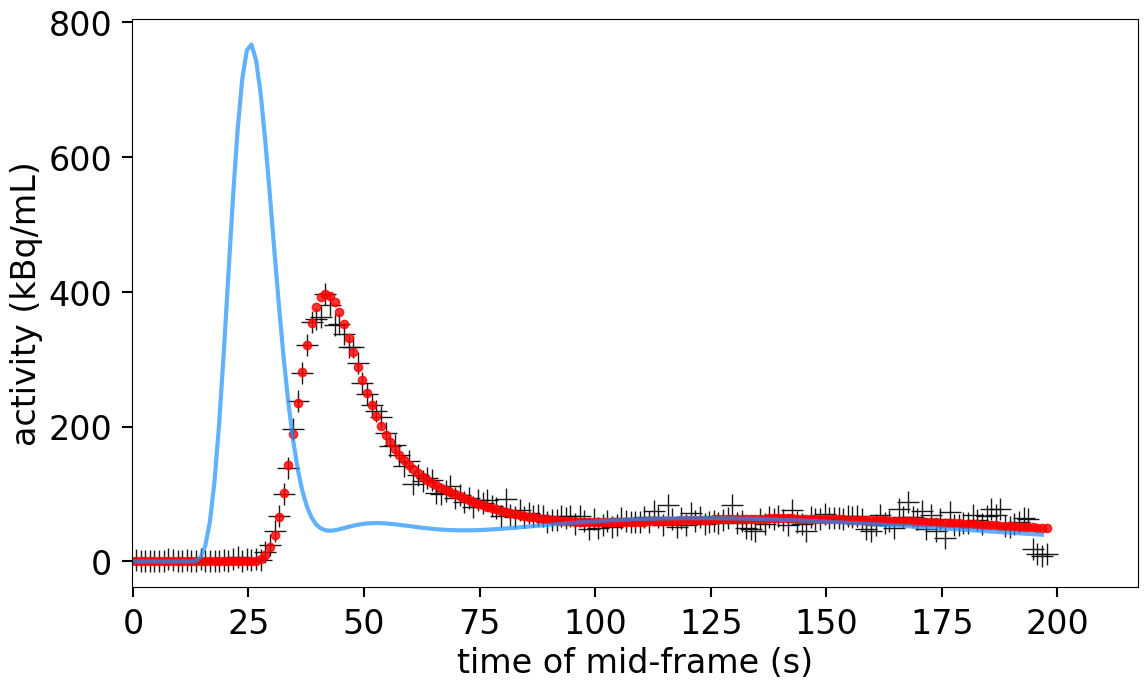

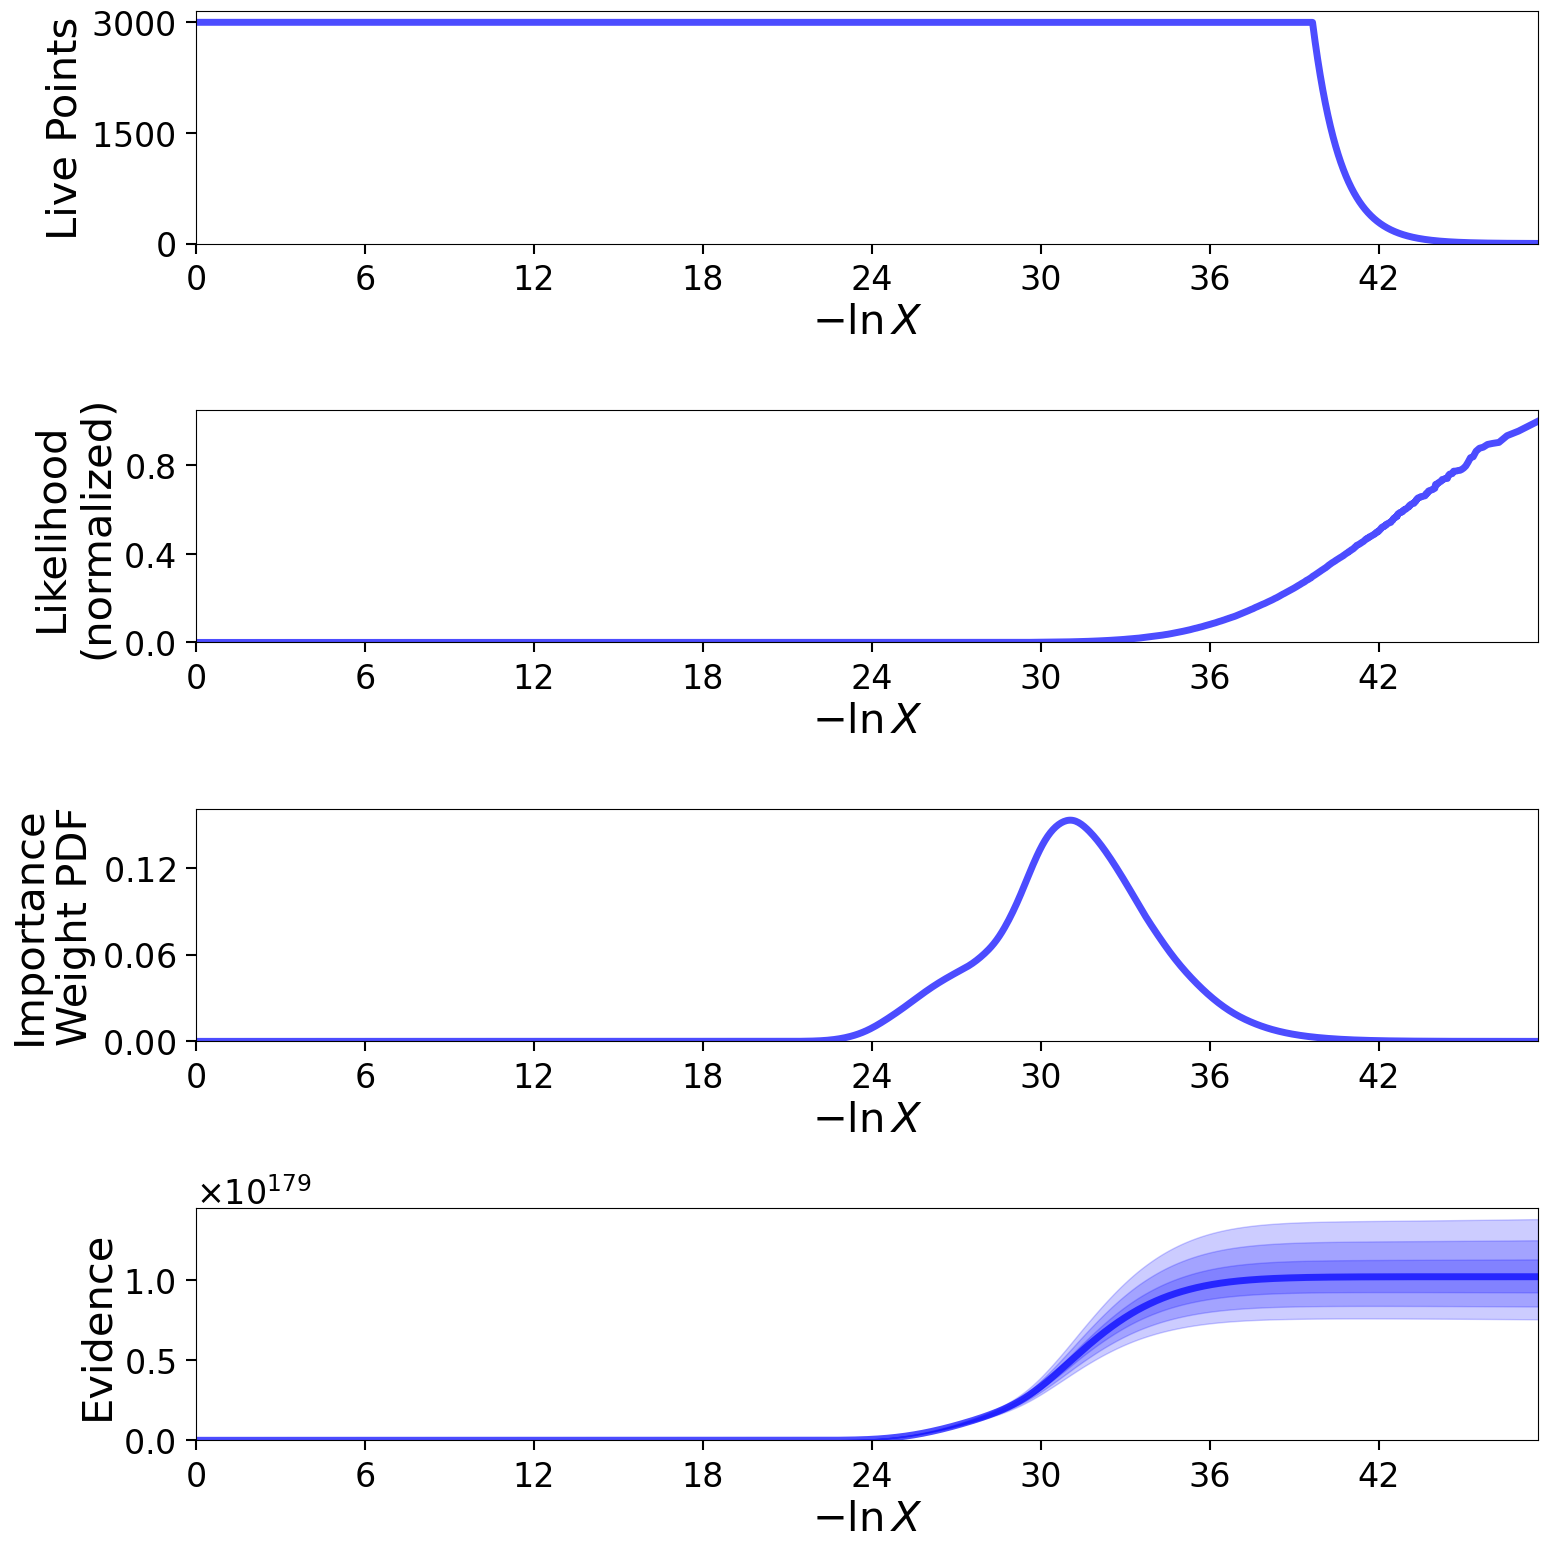

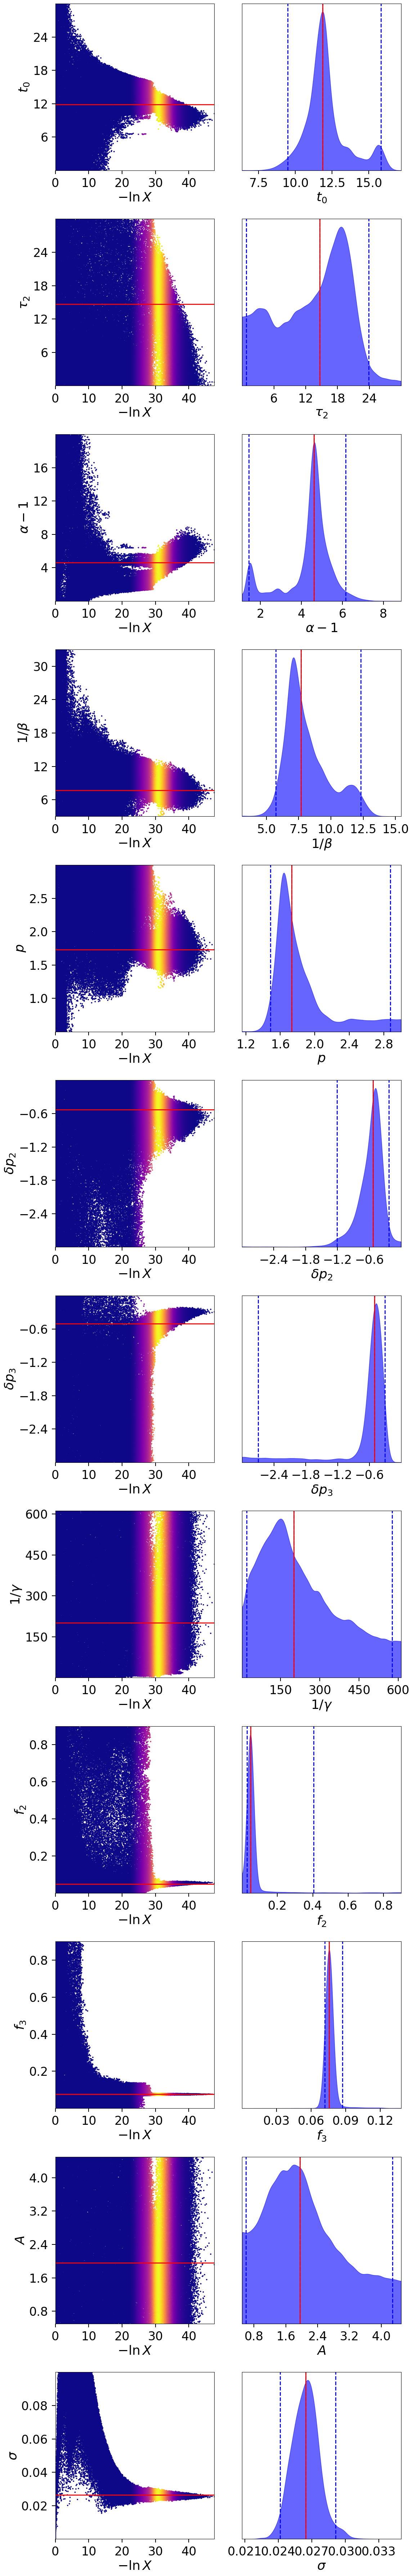

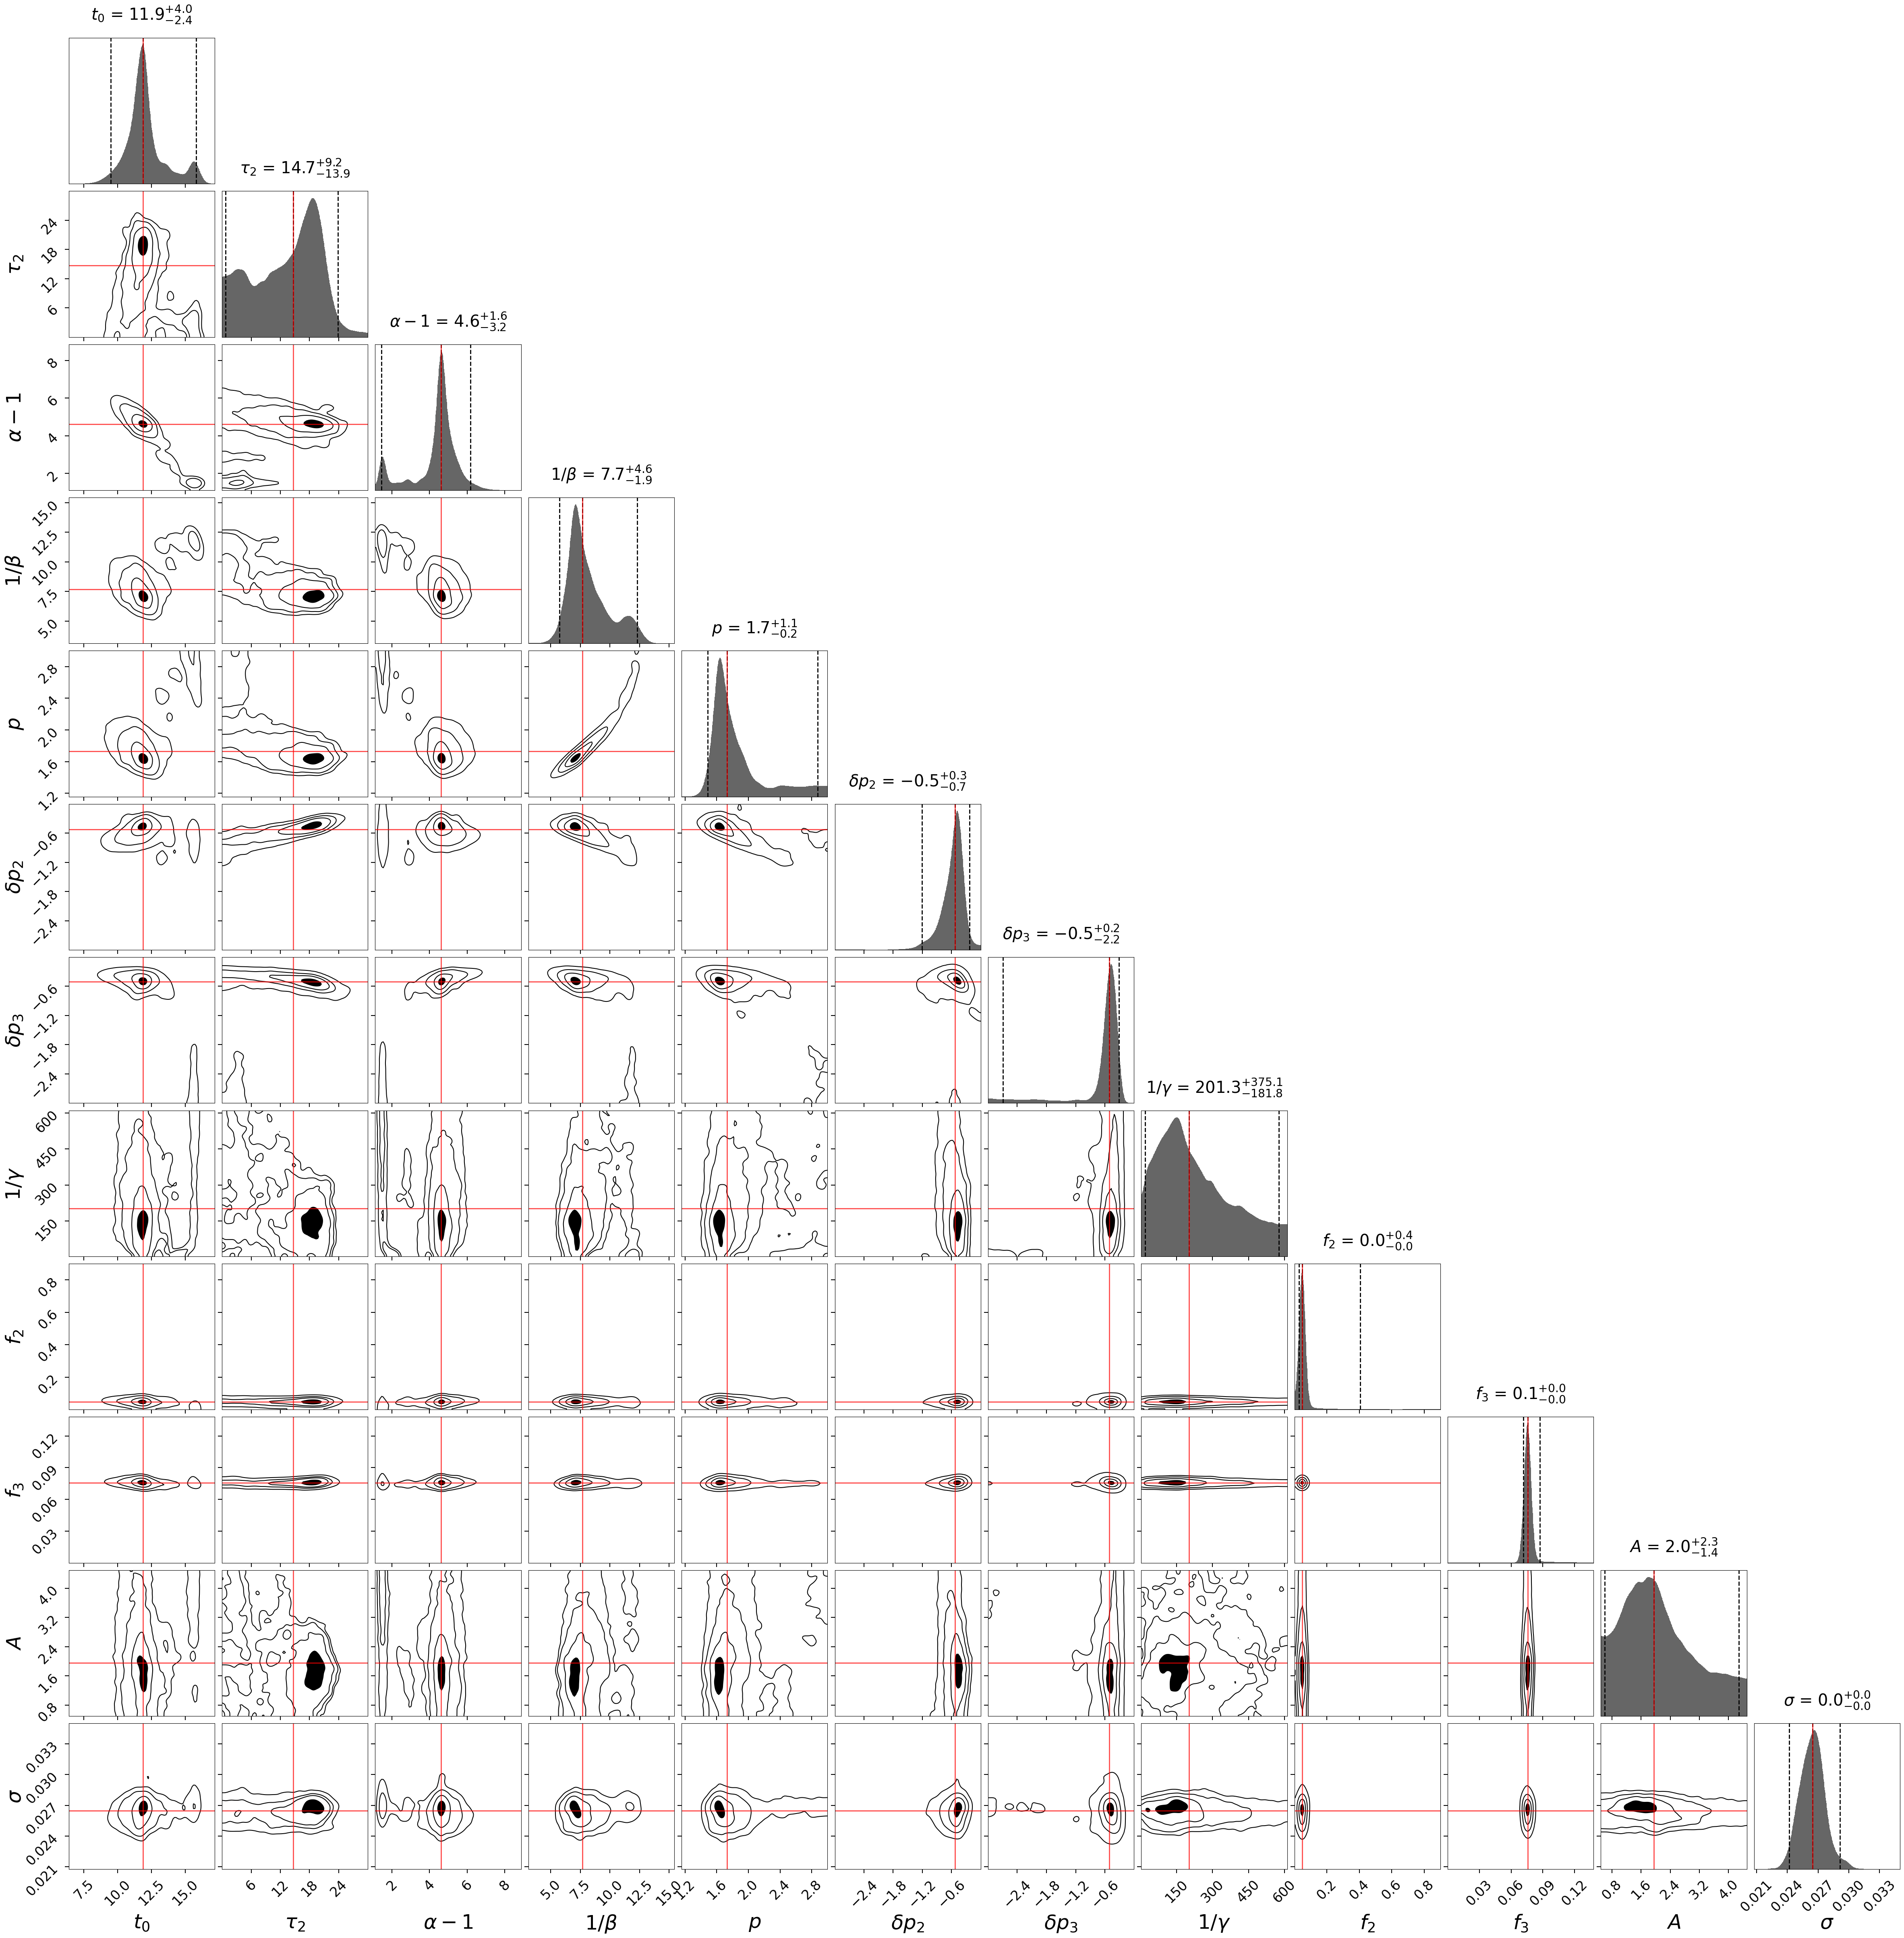

In [5]:
results_ra = ra.solver.run_nested(print_progress=True)
ra.plotting.results_plot()

# Inspect Boxcar

In [6]:
dd = {
    "input_func_fqfn": idif,
    "tag": "playground_bc",
    "nlive": 3000
}
bc = BoxcarContext(dd)

### Plot Boxcar bc

In [ ]:
bc.plotting.truths_plot(truths_idif)

### Let's sample from this distribution of bc using the default `dynesty` settings with `'slice'`.

Previously, 4bolus model with t^(alpha - 1) gave:  
    # iter: 23900 | batch: 6 | bound: 22 | nc: 1 | ncall: 2130740 | eff(%):  1.107 |   
    # loglstar: 385.219 < 396.293 < 393.275 | logz: 347.713 +/-  0.256 | stop:  0.912  

137093it [02:34, 887.10it/s, batch: 0 | bound: 120 | nc: 1 | ncall: 10764086 | eff(%):  1.274 | loglstar:   -inf < 354.653 <    inf | logz: 314.568 +/-  0.109 | dlogz:  0.000 >  0.010]  


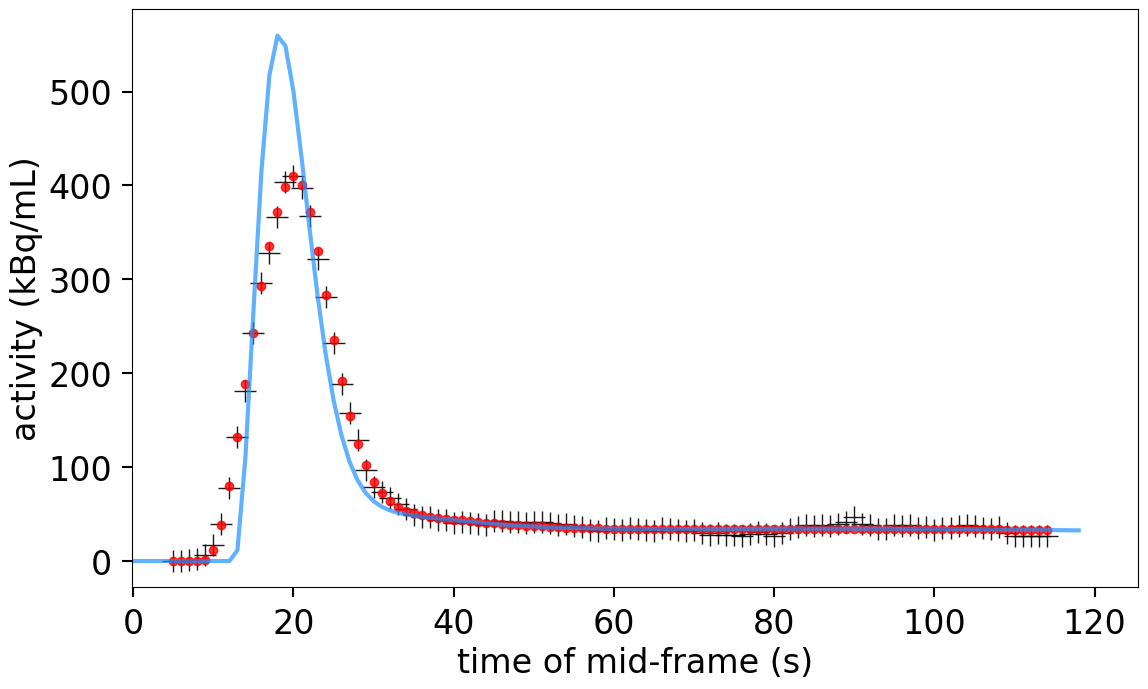

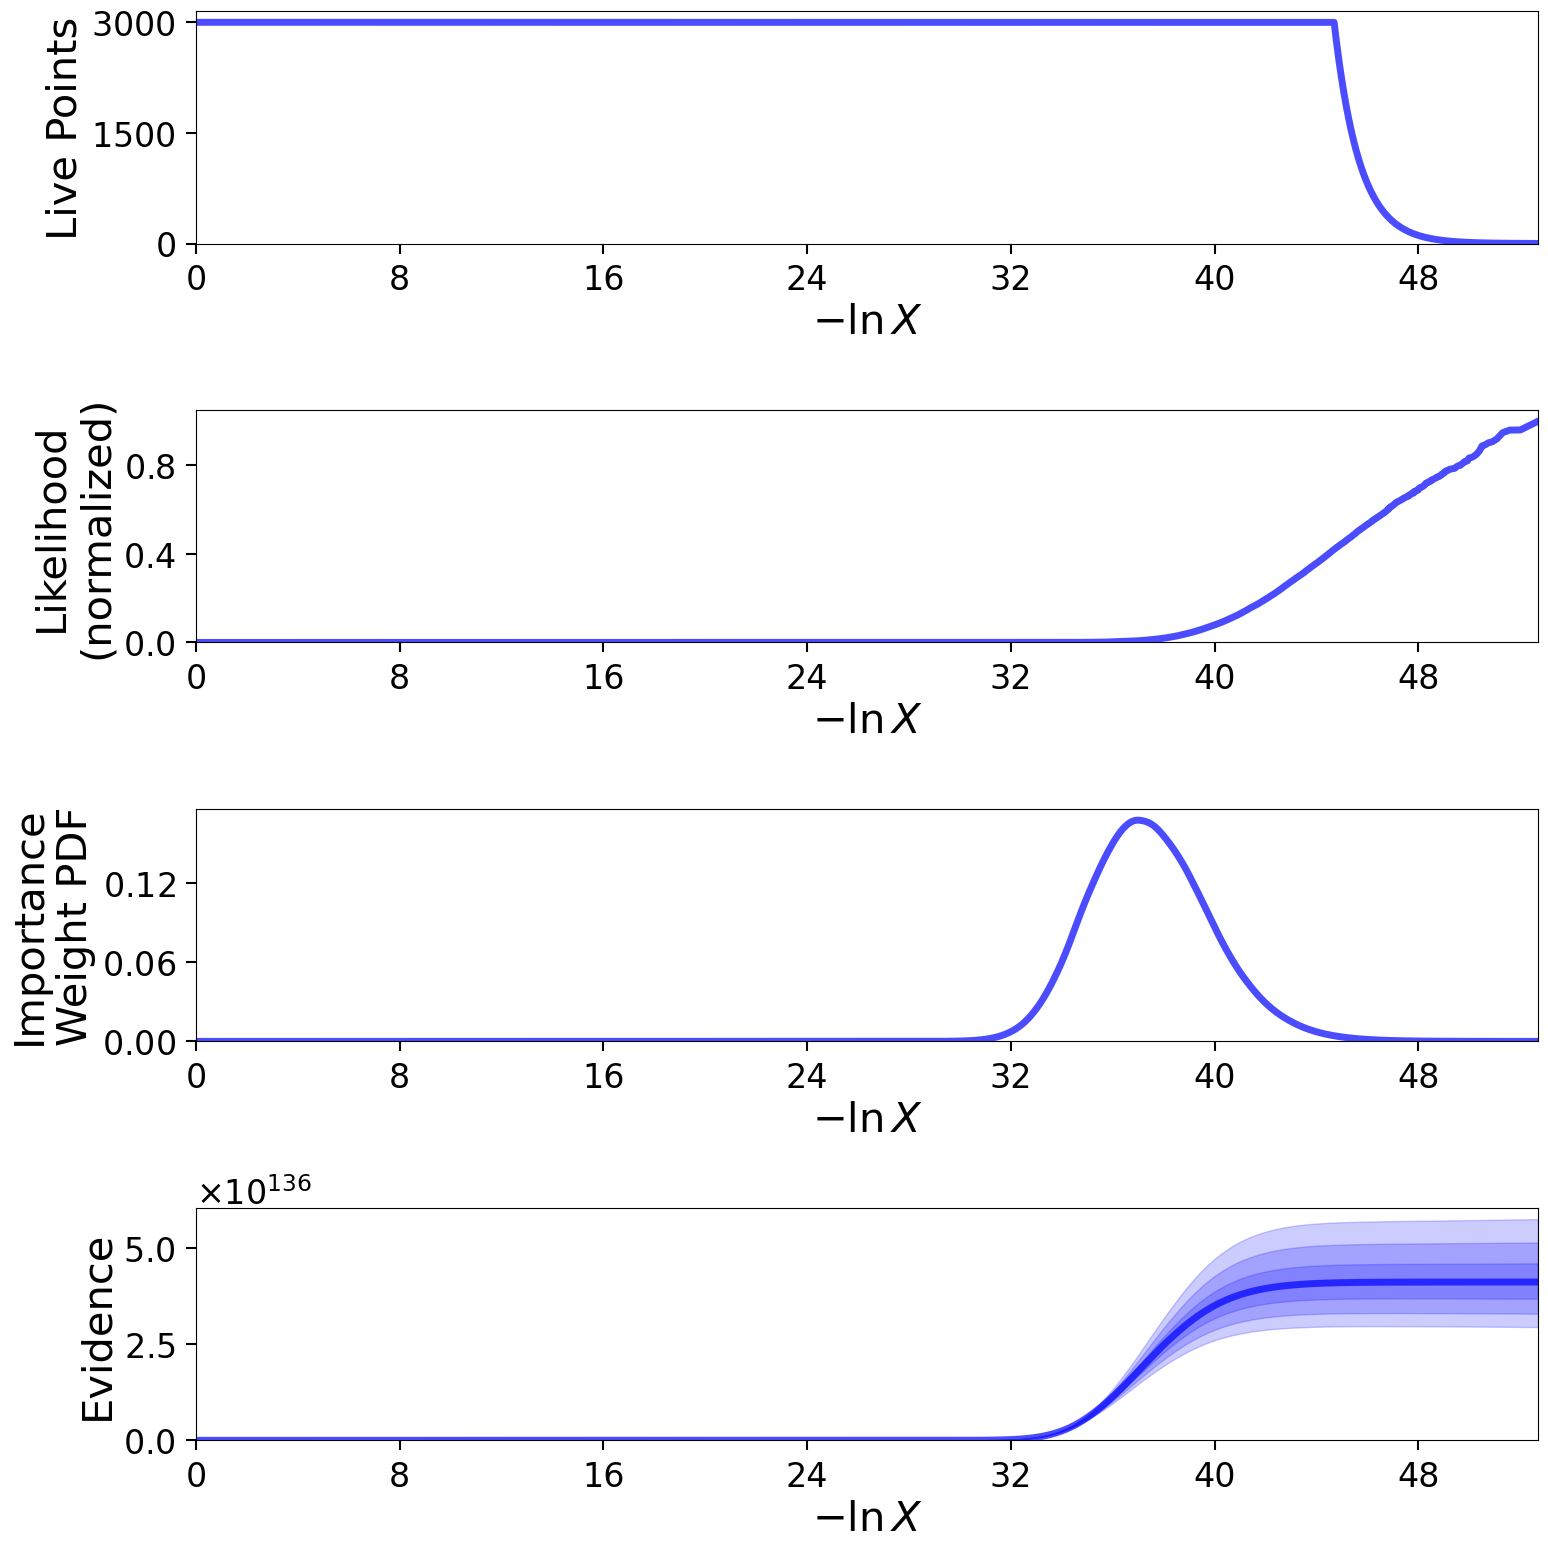

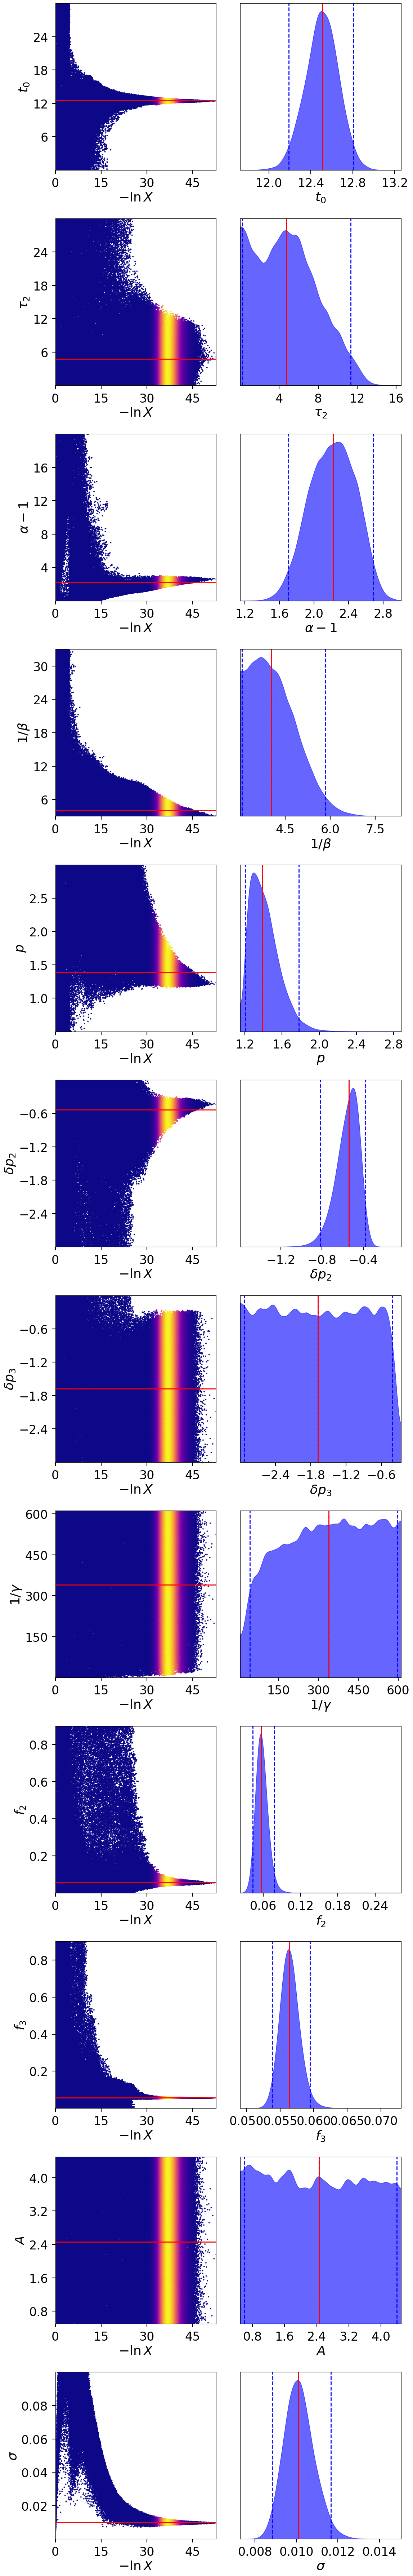

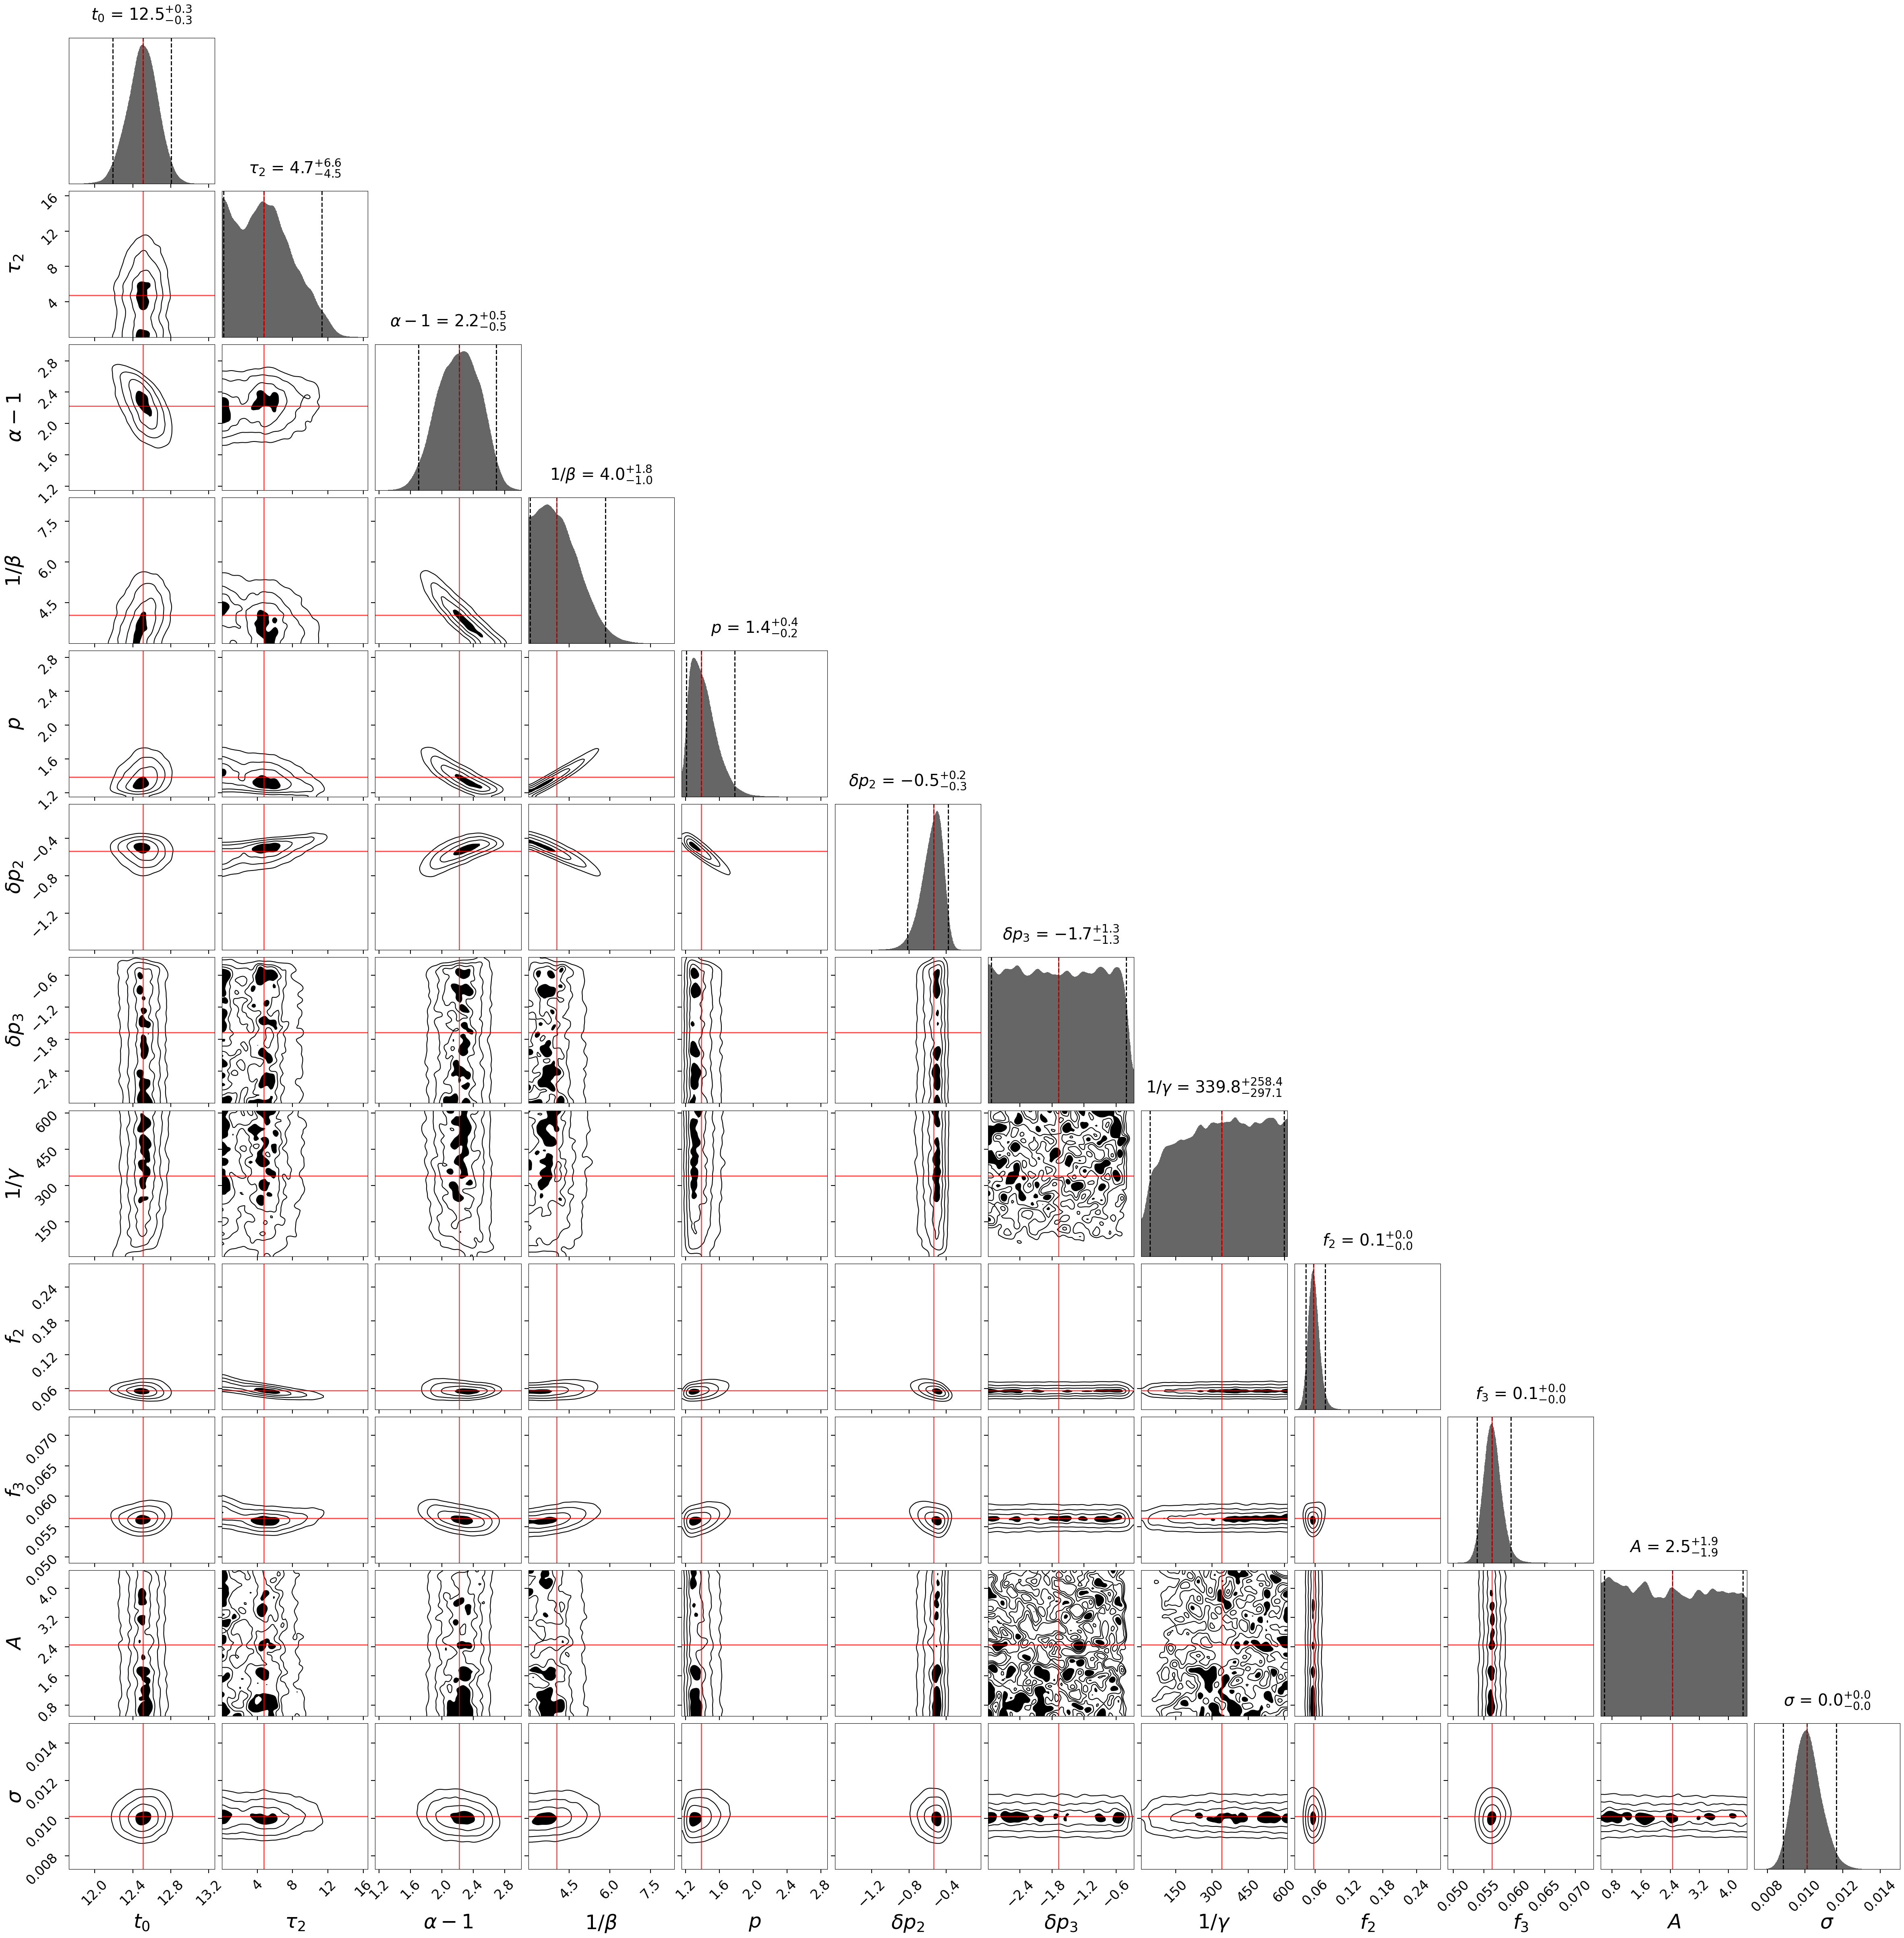

In [7]:
results_bc = bc.solver.run_nested(print_progress=True)
bc.plotting.results_plot()

In [ ]:
pprint(ra.solver.truths)

In [ ]:
pprint(bc.solver.truths)